In [89]:
# importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
# Exporting csv using pandas

MPG = pd.read_csv("auto-mpg[1].csv")
print(MPG)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [91]:
# exploring data
MPG = MPG.fillna(0)
MPG = MPG.replace("NaN", 0)
MPG = MPG.drop_duplicates()
print(MPG["horsepower"].unique())
MPG = MPG.replace("?","")

MPG["horsepower"] = pd.to_numeric(MPG["horsepower"], errors="coerce")
MPG["horsepower"].fillna(MPG["horsepower"]).mean()

print(MPG.dtypes)
print(MPG.shape)




['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
(398, 9)


In [92]:
# removing outliners
MPG=MPG[(MPG["cylinders"] > 5) & 
        (MPG["horsepower"] > 0)]

MPG = MPG.dropna()

print(MPG.shape)

(186, 9)


In [93]:
feature_cols = MPG[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]]
x = feature_cols
y = MPG.mpg

print(x)
print(y)

     cylinders  displacement  horsepower  weight  acceleration  model year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
365          6         200.0        88.0    3060          17.1          81   
366          6         225.0        85.0    3465          16.6          81   
386          6         181.0       110.0    2945          16.4          82   
387          6         262.0        85.0    3015          17.0          82   
389          6         232.0       112.0    2835          14.7          82   

     origin  
0         1  
1         1  
2         1  
3      

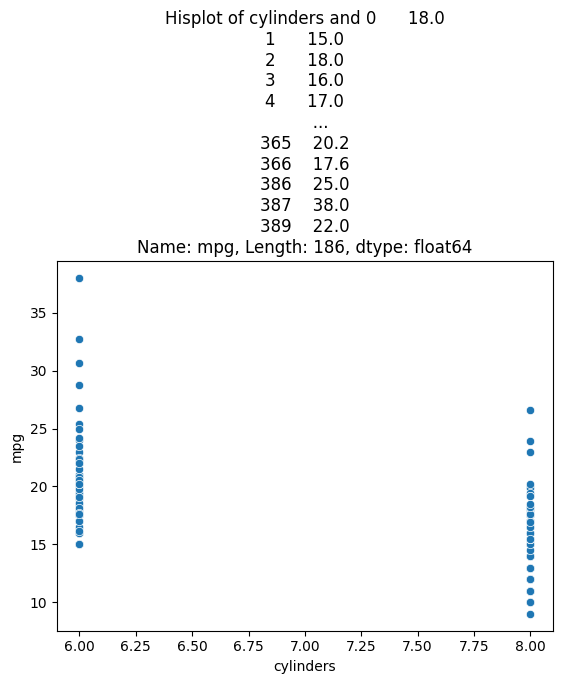

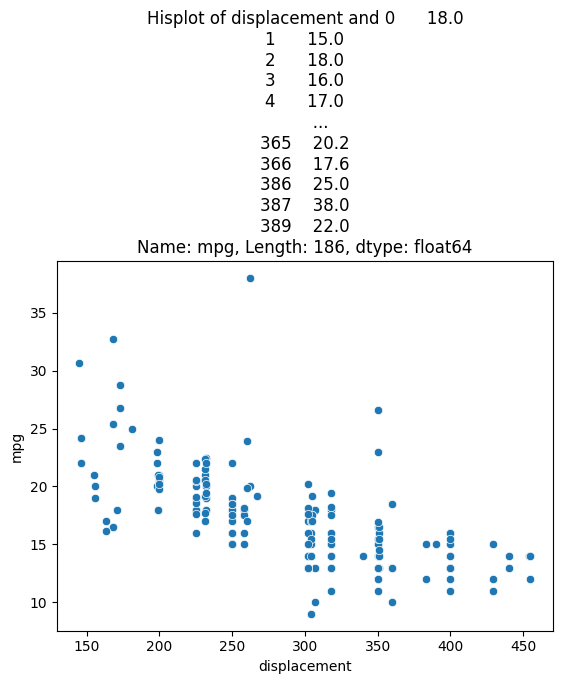

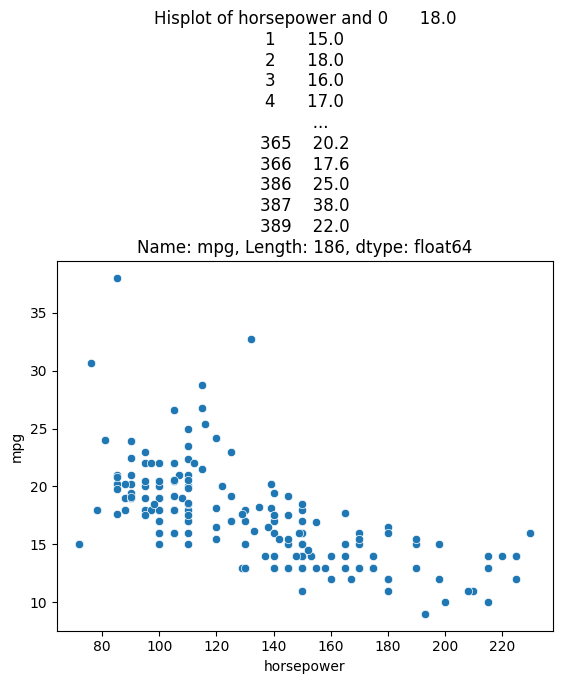

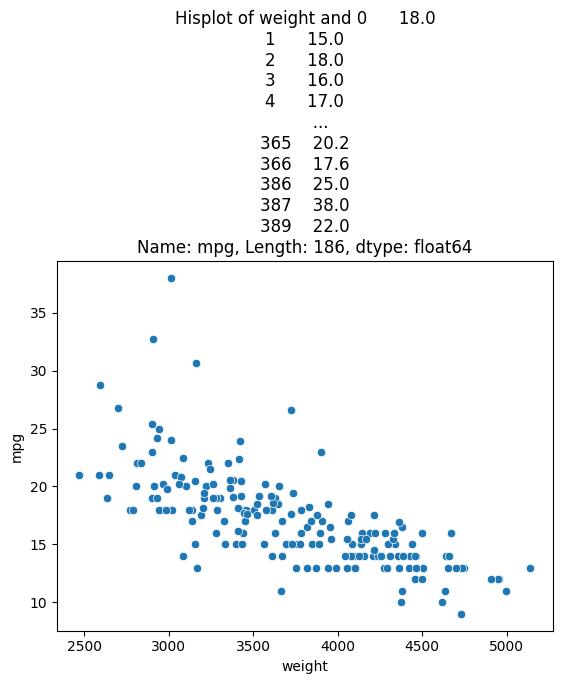

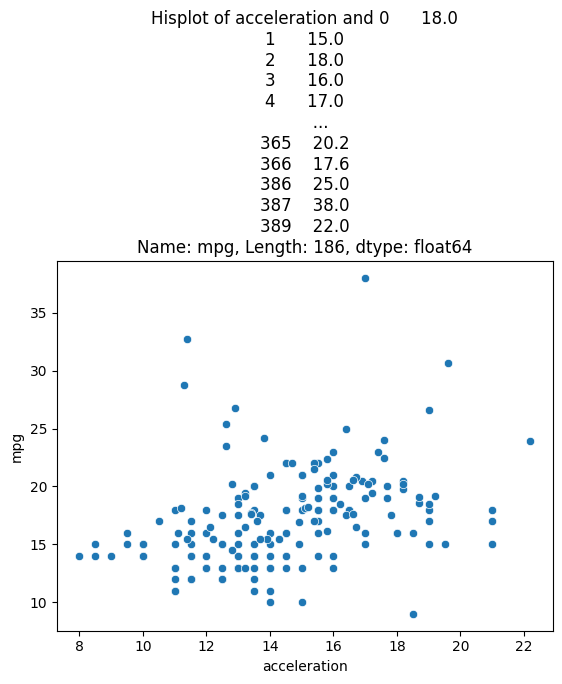

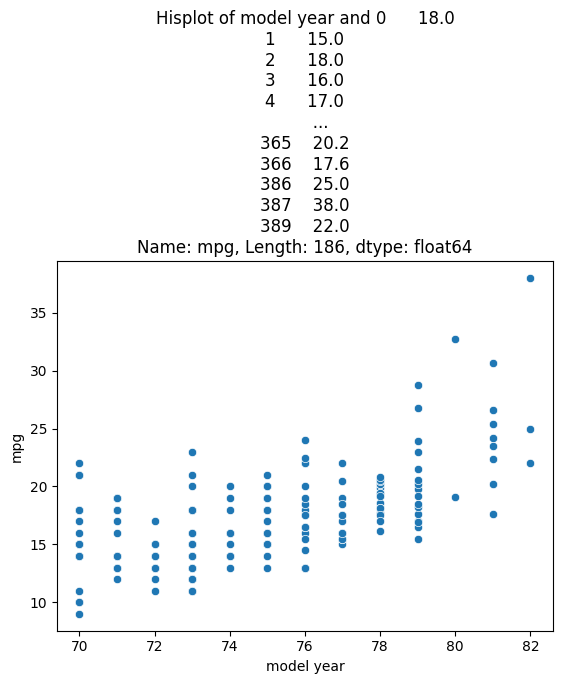

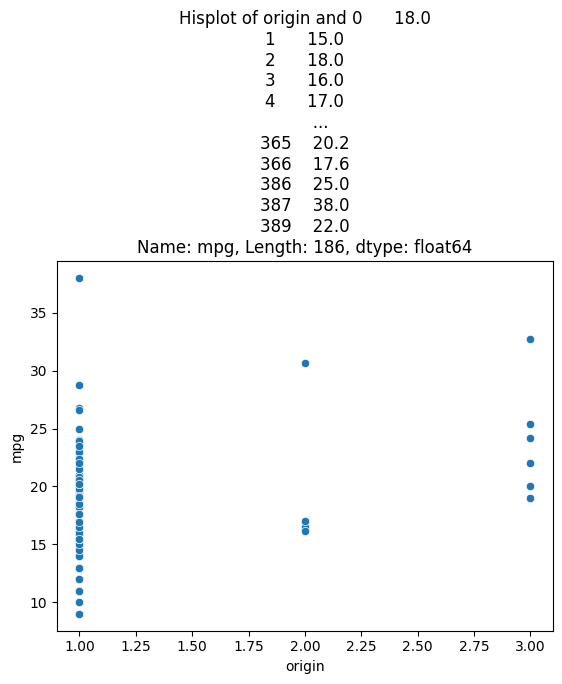

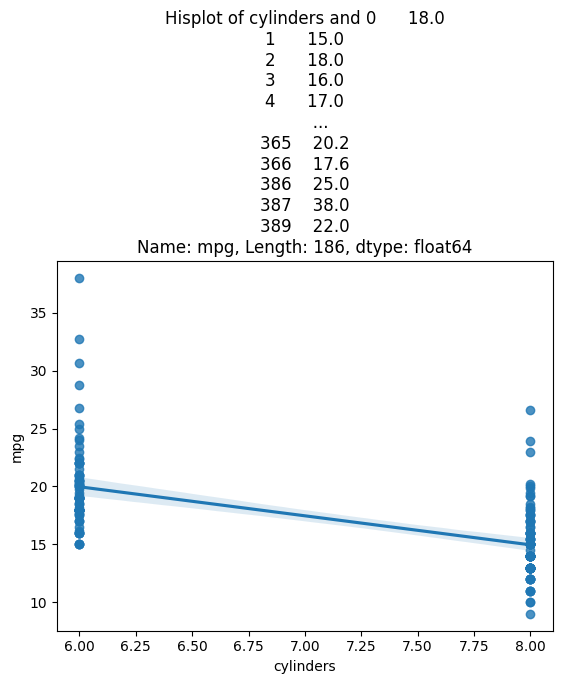

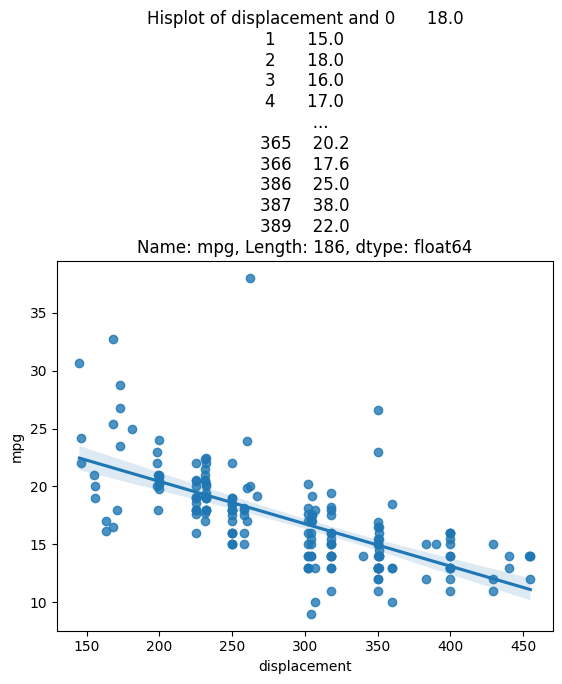

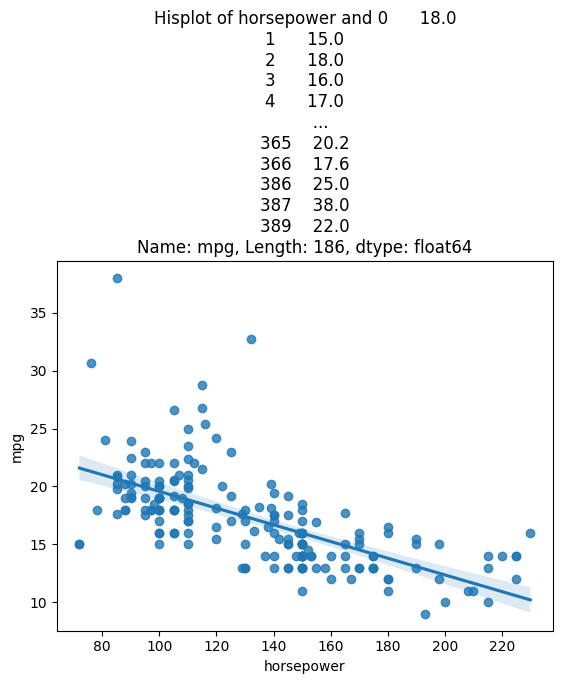

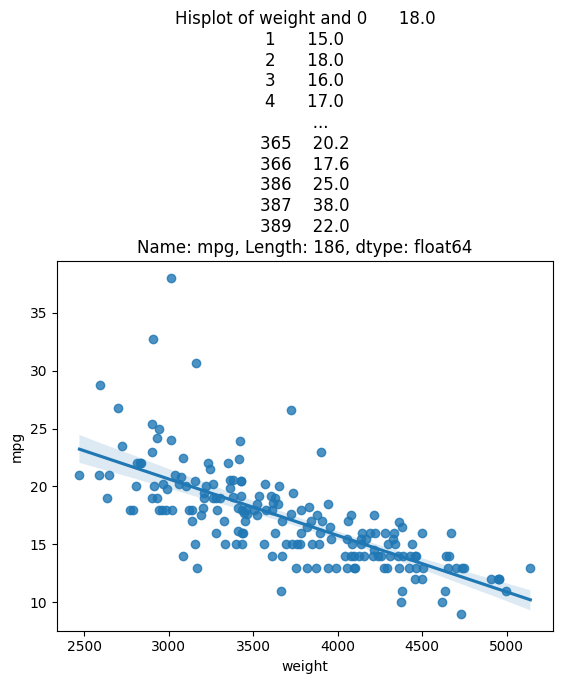

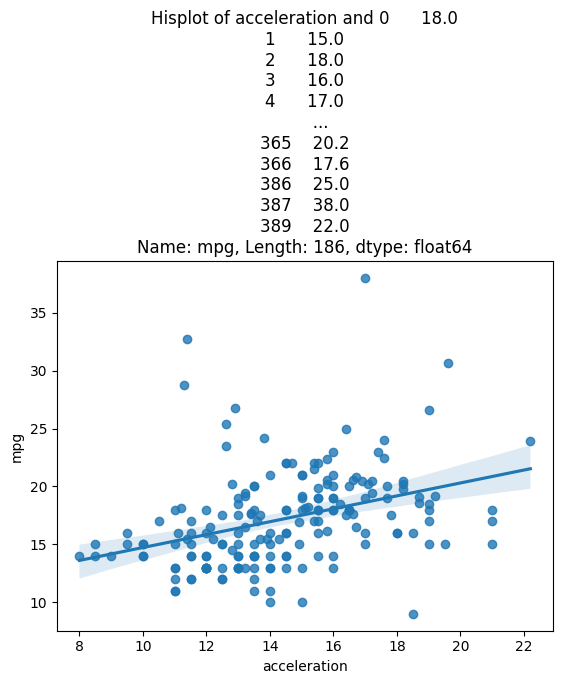

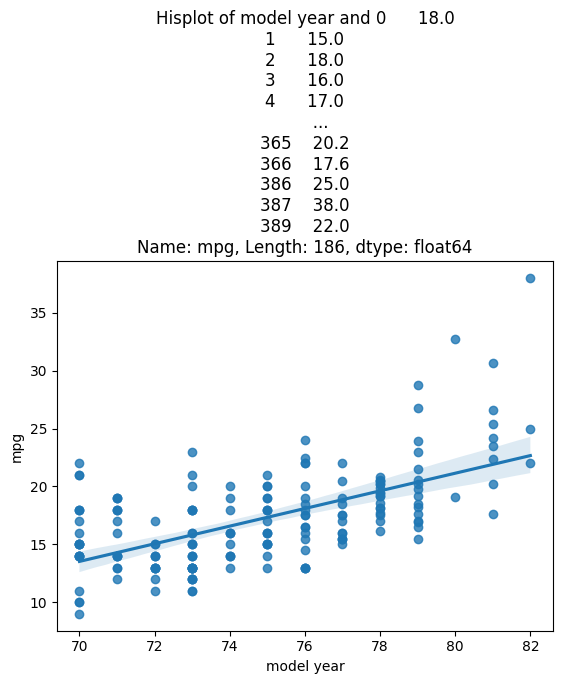

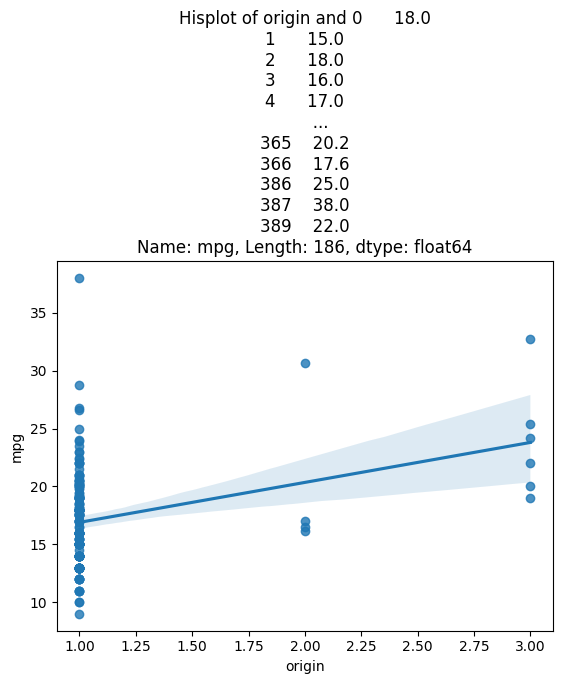

In [94]:
# using seaborn to analyze dataset

for feature in x:
    sns.scatterplot(x=feature, y=y, data = MPG).set(title=f'Hisplot of {feature} and {y}')
    plt.show()

for feature in x:
    sns.regplot(x=feature, y=y, data = MPG).set(title=f'Hisplot of {feature} and {y}')
    plt.show()


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
365  20.2          6         200.0        88.0    3060          17.1   
366  17.6          6         225.0        85.0    3465          16.6   
386  25.0          6         181.0       110.0    2945          16.4   
387  38.0          6         262.0        85.0    3015          17.0   
389  22.0          6         232.0       112.0    2835          14.7   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

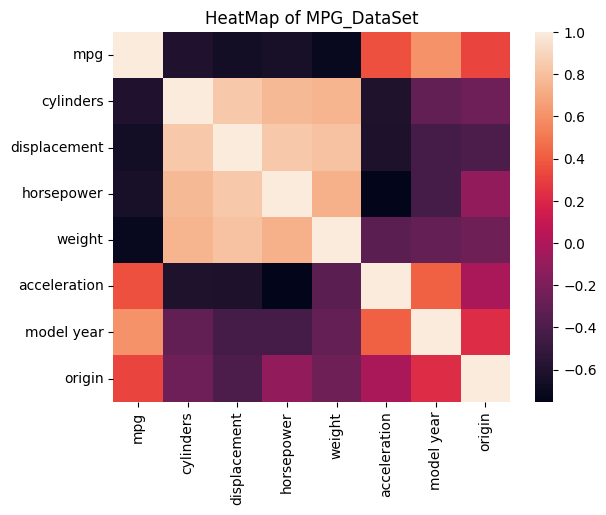

In [95]:
# Correlation can be done of only numeric values so we have to make a dataset using only numeric columns
numeric_MPG = MPG.select_dtypes(include=["int64", "float64"])
print(numeric_MPG)
corr = numeric_MPG.corr()
print(corr)

sns.heatmap(numeric_MPG.corr()).set(title="HeatMap of MPG_DataSet")
plt.show()

In [96]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_Scaled = scaler.transform(x.values)
print(x_Scaled)

[[ 0.89767769  0.2466935  -0.08104069 ... -0.90318006 -1.46986405
  -0.22736817]
 [ 0.89767769  0.81992261  0.8781864  ... -1.08921715 -1.46986405
  -0.22736817]
 [ 0.89767769  0.3933335   0.46708907 ... -1.27525423 -1.46986405
  -0.22736817]
 ...
 [-1.11398557 -1.4330011  -0.62917046 ...  0.73394632  2.1916723
  -0.22736817]
 [-1.11398557 -0.35319743 -1.31433266 ...  0.95719083  2.1916723
  -0.22736817]
 [-1.11398557 -0.75312472 -0.57435748 ...  0.10142022  2.1916723
  -0.22736817]]


d:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [97]:
# Model fitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, train_size=0.75, random_state=50)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r_score = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Root Mean Square error: {rmse:.2f}')
print(f'R2_Score: {r_score}\n')


Mean absolute error: 1.31
Root Mean Square error: 1.74
R2_Score: 0.6431146633415652

